In [1]:
import math
import torch
import hess
import matplotlib.pyplot as plt
from hess.nets import Transformer
import hess.loss_surfaces as loss_surfaces
import numpy as np
import sklearn.datasets as datasets
import hess.utils as utils

In [2]:
def twospirals(n_points, noise=.5, random_state=920):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 600 * (2*np.pi)/360
    d1x = -1.5*np.cos(n)*n + np.random.randn(n_points,1) * noise
    d1y =  1.5*np.sin(n)*n + np.random.randn(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

In [3]:
X, Y = twospirals(500, noise=1.5)

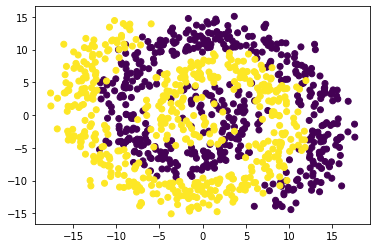

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [5]:
train_x = torch.FloatTensor(X)

In [6]:
train_y = torch.FloatTensor(Y).unsqueeze(-1)

In [7]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(2)
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    train_x, train_y = train_x.cuda(), train_y.cuda()

In [8]:
in_dim = 2
out_dim = 1
model = hess.nets.SimpleNet(in_dim, out_dim, n_hidden=5, hidden_size=20,
                     activation=torch.nn.ELU(), bias=True)

In [9]:
buffer = 0.3
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()
pred = torch.sigmoid(model(in_grid)).detach().reshape(xx.shape)

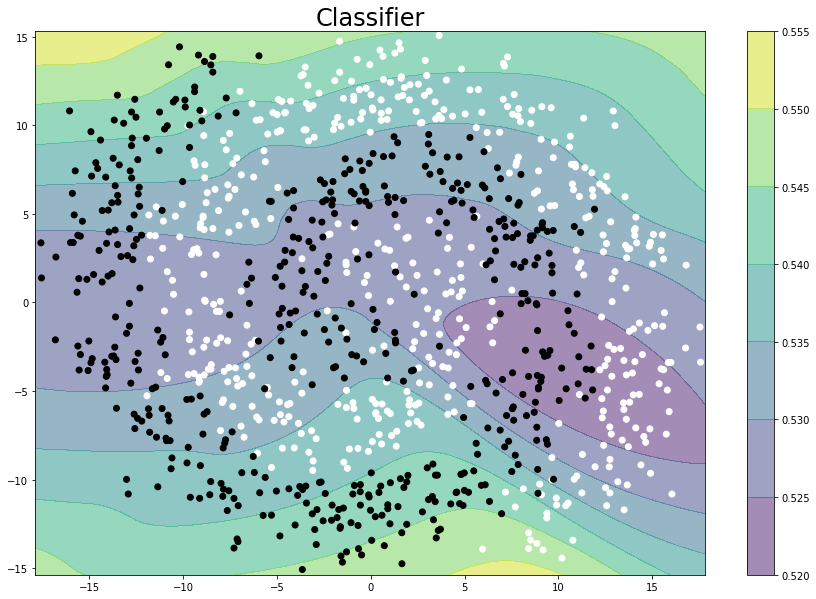

In [10]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, pred, alpha=0.5)
# plt.title("Temp Scaled", fontsize=24)
plt.title("Classifier", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)
# plt.savefig("./two-spiral-classifier.pdf", bbox_inches="tight")

In [11]:
print(sum(p.numel() for p in model.parameters()))

2181


In [12]:
par_list = model.parameters()
n_par = sum(torch.numel(p) for p in par_list)

In [13]:
if use_cuda:
    model = model.cuda()

In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_func = torch.nn.BCEWithLogitsLoss()

losses = []

for step in range(2000):
    optimizer.zero_grad()
    outputs = model(train_x)

    loss=loss_func(outputs, train_y)
    trainL = loss.item()
    print("train loss = ", trainL)
    losses.append(trainL)
    loss.backward()
    optimizer.step()
    
#     ## compute test loss ##
#     outputs = model(test_x)
#     testL = loss_func(outputs,test_y).item()
#     test_losses.append(testL)
#     print("test loss = ", testL)


train loss =  0.694726824760437
train loss =  0.6747350692749023
train loss =  0.6556394696235657
train loss =  0.646530270576477
train loss =  0.6516467928886414
train loss =  0.6457470655441284
train loss =  0.6398074626922607
train loss =  0.6386556029319763
train loss =  0.6387233138084412
train loss =  0.6363539099693298
train loss =  0.6313422918319702
train loss =  0.6261228322982788
train loss =  0.6220120191574097
train loss =  0.6177260875701904
train loss =  0.610404372215271
train loss =  0.5998263955116272
train loss =  0.5966459512710571
train loss =  0.5821883678436279
train loss =  0.574891984462738
train loss =  0.5602379441261292
train loss =  0.5537391901016235
train loss =  0.5616652369499207
train loss =  0.557234525680542
train loss =  0.5178799033164978
train loss =  0.5435686707496643
train loss =  0.5065512657165527
train loss =  0.5274146199226379
train loss =  0.4957442283630371
train loss =  0.5036951303482056
train loss =  0.48001936078071594
train loss =  

train loss =  0.16850027441978455
train loss =  0.15752147138118744
train loss =  0.1796208769083023
train loss =  0.17241674661636353
train loss =  0.15506386756896973
train loss =  0.1718391627073288
train loss =  0.16175194084644318
train loss =  0.15978141129016876
train loss =  0.16455653309822083
train loss =  0.15585003793239594
train loss =  0.16260094940662384
train loss =  0.15506064891815186
train loss =  0.15938760340213776
train loss =  0.15738357603549957
train loss =  0.1540192812681198
train loss =  0.15867890417575836
train loss =  0.15257208049297333
train loss =  0.1564890444278717
train loss =  0.1535835862159729
train loss =  0.1534522920846939
train loss =  0.15403221547603607
train loss =  0.1519436240196228
train loss =  0.1536920964717865
train loss =  0.15129396319389343
train loss =  0.1524239033460617
train loss =  0.15164963901042938
train loss =  0.15043684840202332
train loss =  0.1518634408712387
train loss =  0.15022870898246765
train loss =  0.15042063

train loss =  0.14471159875392914
train loss =  0.13458074629306793
train loss =  0.14754661917686462
train loss =  0.14506219327449799
train loss =  0.1284930408000946
train loss =  0.1480392962694168
train loss =  0.13335071504116058
train loss =  0.13031603395938873
train loss =  0.13912048935890198
train loss =  0.12838684022426605
train loss =  0.13283967971801758
train loss =  0.12719252705574036
train loss =  0.13031627237796783
train loss =  0.1257992535829544
train loss =  0.12952867150306702
train loss =  0.12622849643230438
train loss =  0.12803786993026733
train loss =  0.12592221796512604
train loss =  0.1239589974284172
train loss =  0.1276549994945526
train loss =  0.12490121275186539
train loss =  0.12812089920043945
train loss =  0.12965607643127441
train loss =  0.13264842331409454
train loss =  0.124564990401268
train loss =  0.12294737994670868
train loss =  0.12283223867416382
train loss =  0.12800471484661102
train loss =  0.13383394479751587
train loss =  0.12952

train loss =  0.0984840914607048
train loss =  0.09835631400346756
train loss =  0.09851637482643127
train loss =  0.09786156564950943
train loss =  0.0976334661245346
train loss =  0.09772662073373795
train loss =  0.09721802920103073
train loss =  0.09703525900840759
train loss =  0.09685253351926804
train loss =  0.09683734178543091
train loss =  0.0965406522154808
train loss =  0.09614782780408859
train loss =  0.09603972733020782
train loss =  0.09597256034612656
train loss =  0.09609273821115494
train loss =  0.09582815319299698
train loss =  0.09558671712875366
train loss =  0.09538227319717407
train loss =  0.09512799978256226
train loss =  0.09498640894889832
train loss =  0.09486319869756699
train loss =  0.09480685740709305
train loss =  0.09497110545635223
train loss =  0.0951978862285614
train loss =  0.0964144766330719
train loss =  0.0991605669260025
train loss =  0.10589250177145004
train loss =  0.11610887944698334
train loss =  0.13067151606082916
train loss =  0.1665

train loss =  0.0774197056889534
train loss =  0.07737662643194199
train loss =  0.07570185512304306
train loss =  0.0768086388707161
train loss =  0.0765886902809143
train loss =  0.07548843324184418
train loss =  0.07469189912080765
train loss =  0.07452067732810974
train loss =  0.0747380182147026
train loss =  0.07501158863306046
train loss =  0.07378654927015305
train loss =  0.07386726140975952
train loss =  0.07316567003726959
train loss =  0.07324367761611938
train loss =  0.07356066256761551
train loss =  0.07372435182332993
train loss =  0.07342727482318878
train loss =  0.07325505465269089
train loss =  0.07444729655981064
train loss =  0.07277519255876541
train loss =  0.07230022549629211
train loss =  0.07178525626659393
train loss =  0.07219605892896652
train loss =  0.07214700430631638
train loss =  0.07434919476509094
train loss =  0.08038850128650665
train loss =  0.09972649812698364
train loss =  0.10689056664705276
train loss =  0.10881319642066956
train loss =  0.12

train loss =  0.05827285721898079
train loss =  0.05800933018326759
train loss =  0.05713197961449623
train loss =  0.0565456748008728
train loss =  0.05682716518640518
train loss =  0.057383257895708084
train loss =  0.05786202475428581
train loss =  0.05800029635429382
train loss =  0.05870981886982918
train loss =  0.060979437083005905
train loss =  0.06092062219977379
train loss =  0.06466136127710342
train loss =  0.06281250715255737
train loss =  0.06935311108827591
train loss =  0.06640270352363586
train loss =  0.06713813543319702
train loss =  0.06522250175476074
train loss =  0.06196589022874832
train loss =  0.057194121181964874
train loss =  0.05603374168276787
train loss =  0.059534672647714615
train loss =  0.06369872391223907
train loss =  0.0591239295899868
train loss =  0.05796381086111069
train loss =  0.06108124181628227
train loss =  0.06265268474817276
train loss =  0.0570424385368824
train loss =  0.05608851835131645
train loss =  0.05747794732451439
train loss = 

train loss =  0.07333342730998993
train loss =  0.07306785136461258
train loss =  0.07279673963785172
train loss =  0.07253718376159668
train loss =  0.07228349149227142
train loss =  0.07201948761940002
train loss =  0.0717783272266388
train loss =  0.07153432816267014
train loss =  0.07128841429948807
train loss =  0.07105282694101334
train loss =  0.0708155557513237
train loss =  0.07058023661375046
train loss =  0.07035136222839355
train loss =  0.07012150436639786
train loss =  0.06989503651857376
train loss =  0.0696728378534317
train loss =  0.06945089995861053
train loss =  0.06923490017652512
train loss =  0.0690179243683815
train loss =  0.06880544126033783
train loss =  0.06859423220157623
train loss =  0.06838502734899521
train loss =  0.06818000227212906
train loss =  0.06797473877668381
train loss =  0.06777269393205643
train loss =  0.06757375597953796
train loss =  0.06737560778856277
train loss =  0.06718067079782486
train loss =  0.06698737293481827
train loss =  0.06

train loss =  0.047714702785015106
train loss =  0.04757870361208916
train loss =  0.04744449630379677
train loss =  0.047310687601566315
train loss =  0.04717768356204033
train loss =  0.047045543789863586
train loss =  0.04691436514258385
train loss =  0.04678367078304291
train loss =  0.046654216945171356
train loss =  0.04652582108974457
train loss =  0.046398013830184937
train loss =  0.04627053067088127
train loss =  0.046143874526023865
train loss =  0.04601772129535675
train loss =  0.045892152935266495
train loss =  0.045767221599817276
train loss =  0.0456424355506897
train loss =  0.04551834985613823
train loss =  0.045394767075777054
train loss =  0.04527164623141289
train loss =  0.04514923691749573
train loss =  0.04502745717763901
train loss =  0.04490608721971512
train loss =  0.04478515312075615
train loss =  0.04466477409005165
train loss =  0.04454495385289192
train loss =  0.04442567750811577
train loss =  0.04430704563856125
train loss =  0.04418894648551941
train 

## Let's get this bread

In [15]:
import hess.utils as utils

In [16]:
par_list = model.parameters()
n_par = sum(torch.numel(p) for p in par_list)

In [17]:
hessian = torch.zeros(n_par, n_par)
for pp in range(n_par):
    base_vec = torch.zeros(n_par).unsqueeze(0)
    base_vec[0, pp] = 1.
    
    base_vec = utils.unflatten_like(base_vec, model.parameters())
    utils.eval_hess_vec_prod(base_vec, model,
                            criterion=torch.nn.BCEWithLogitsLoss(),
                            inputs=train_x, targets=train_y)
    if pp == 0:
        output = utils.gradtensor_to_tensor(model, include_bn=True)
        hessian = torch.zeros(output.nelement(), output.nelement())
        hessian[:, pp] = output
    
#     print(pp)
    hessian[:, pp] = utils.gradtensor_to_tensor(model, include_bn=True).cpu()

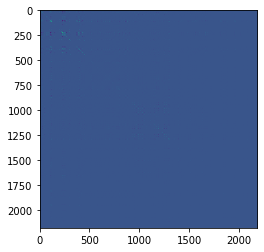

In [18]:
plt.imshow(hessian)

In [19]:
e_val, e_vec = np.linalg.eig(hessian.cpu())
idx = np.abs(e_val).argsort()[::-1]   
e_val = torch.FloatTensor(e_val[idx].real)
e_vec = torch.FloatTensor(e_vec[:,idx].real)

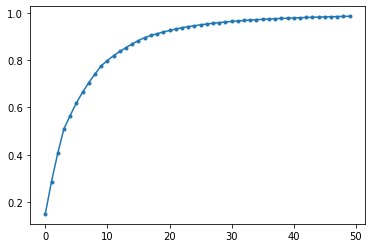

In [20]:
ne = e_val.div(torch.sum(e_val))
plt.plot(np.cumsum(ne[:50].cpu()), marker=".")

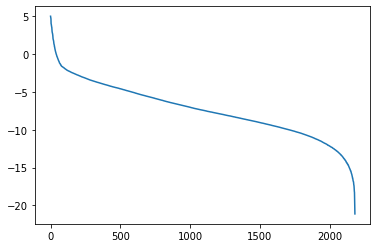

In [21]:
plt.plot(np.log(np.abs(e_val)))

## Save model to use on laptop

In [22]:
# torch.save(optimus.net.state_dict(), "../hess/saved-models/spirals.pt")
saved_pars = model.state_dict()

In [23]:
# torch.save(hessian, "../hess/saved-models/spirals_hessian.pt")

## Do Some Perturbing

In [24]:
from hess.plotting import plot_decision_boundary

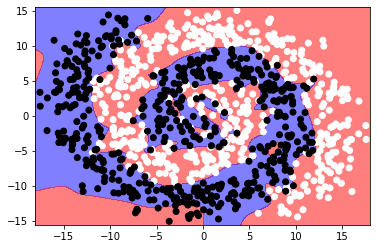

In [25]:
plot_decision_boundary(train_x, train_y, model, use_cuda=False,
                      buffer=0.5, h=0.1)

## Average Over Large Curvature Perturbations

In [26]:
buffer = 0.3
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()

In [27]:
n_vec = 3
scale = 0.0
basis = e_vec[:, :n_vec]
n_trial = 1
pred = torch.zeros(in_grid.size(0), n_trial).cpu()
for tt in range(n_trial):
    model.load_state_dict(saved_pars)
    wghts = torch.randn(n_vec).cpu()
    perturb = basis.matmul(wghts.unsqueeze(-1)).t()
    perturb = perturb.div(perturb.norm()).mul(scale)

    perturb = utils.unflatten_like(perturb, model.parameters())
    for i, par in enumerate(model.parameters()):
        par.data = par.data + perturb[i]
        
    pred[:, tt] = torch.sigmoid(model(in_grid).squeeze().cpu())

In [28]:
avg_pred = pred.mean(1).detach().numpy().reshape(xx.shape)

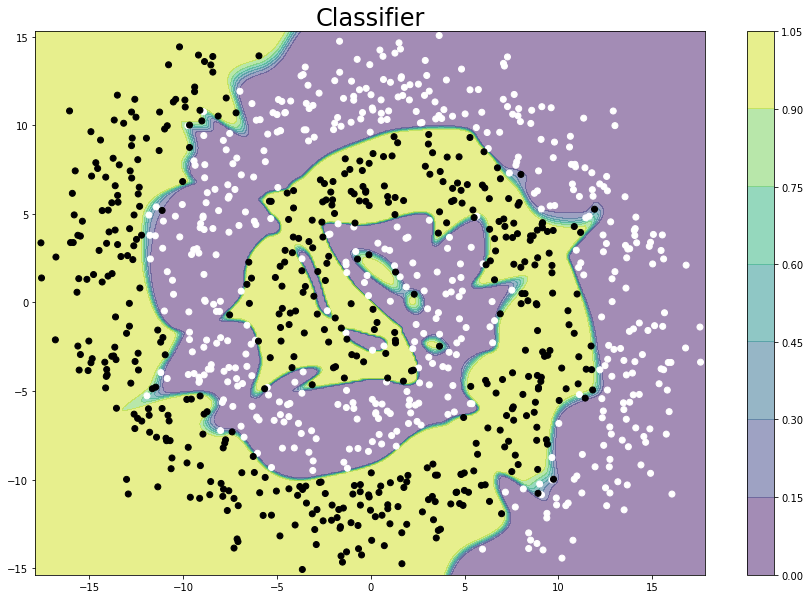

In [29]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, avg_pred, alpha=0.5)
# plt.title("Temp Scaled", fontsize=24)
plt.title("Classifier", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)
# plt.savefig("./two-spiral-classifier.pdf", bbox_inches="tight")

## Small Curvature

In [30]:
n_vec = 10
scale = 1.
basis = e_vec[:, -n_vec:]
n_trial = 1
pred = torch.zeros(in_grid.size(0), n_trial).cpu()
for tt in range(n_trial):
    model.load_state_dict(saved_pars)
    wghts = torch.randn(n_vec).cpu()
    perturb = basis.matmul(wghts.unsqueeze(-1)).t()
    perturb = perturb.div(perturb.norm()).mul(scale)

    perturb = utils.unflatten_like(perturb, model.parameters())
    for i, par in enumerate(model.parameters()):
        par.data = par.data + perturb[i]
        
    pred[:, tt] = torch.sigmoid(model(in_grid).squeeze().cpu())

In [31]:
avg_pred = pred.mean(1).detach().numpy().reshape(xx.shape)

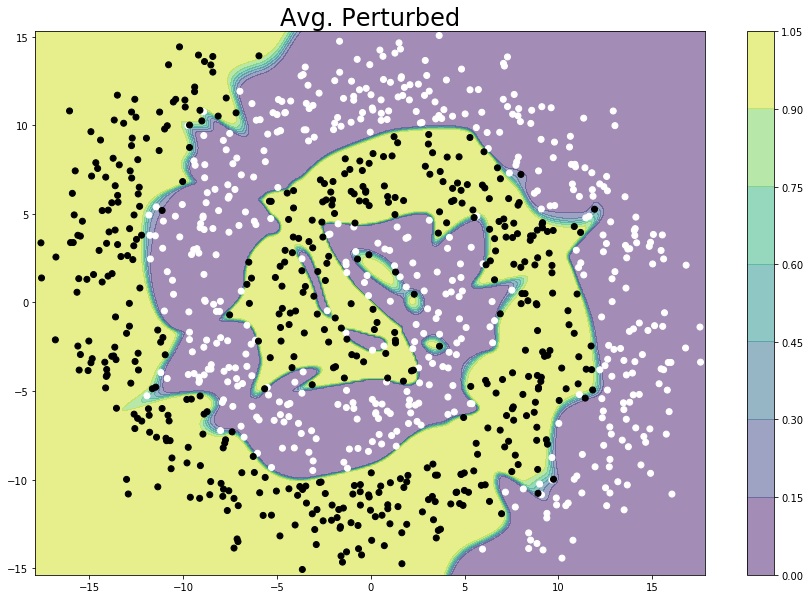

In [32]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, avg_pred, alpha=0.5)
plt.title("Avg. Perturbed", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)

## Get Loss Surfaces

In [66]:
range_ = 0.5
scale = 1.
n_pts = 75

In [67]:
basis = e_vec
full_loss_surface = loss_surfaces.get_loss_surface(basis, model,
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=range_, n_pts=n_pts, scale=scale,
                                             use_cuda=False)

In [68]:
nvec = 3
basis = e_vec[:, :nvec]
high_loss_surface = loss_surfaces.get_loss_surface(basis, model,
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=range_, n_pts=n_pts, scale=scale,
                                             use_cuda=False)

In [69]:
nvec = 1500
basis = e_vec[:, -n_vec:]
low_loss_surface = loss_surfaces.get_loss_surface(basis, model,
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=range_, n_pts=n_pts, scale=scale,
                                             use_cuda=False)

In [70]:
ymin = torch.min(full_loss_surface).log()
ymax = torch.max(full_loss_surface).log()

import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((bottom(np.linspace(1, 0, 128)),
                       top(np.linspace(1, 0, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

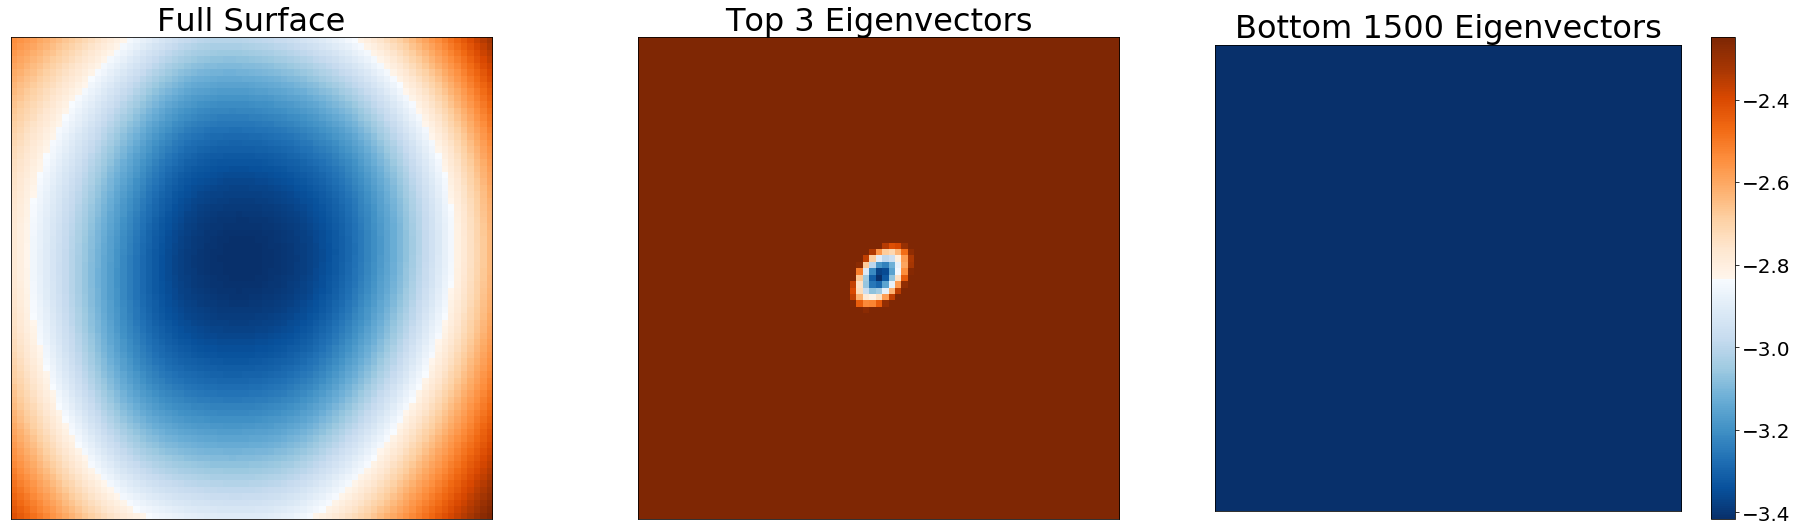

In [71]:
title_fs = 32

fig, ax = plt.subplots(1, 3, figsize=(26, 7.5))
im = ax[0].imshow(full_loss_surface.log().detach(), cmap=newcmp,
                 vmin=ymin, vmax=ymax)
# ax[0].autoscale(False)
# cbar=fig.colorbar(im, ax=ax[0])
# cbar.ax.tick_params(labelsize=20)
# cbar.ax.yaxis.offsetText.set(size=20)
ax[0].set_title("Full Surface",
               fontsize=title_fs)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(high_loss_surface.log().detach(), cmap=newcmp,
                 vmin=ymin, vmax=ymax)
# cbar=fig.colorbar(im, ax=ax[1])
# cbar.ax.tick_params(labelsize=20)
# ax[1].autoscale(False)
ax[1].set_title("Top 3 Eigenvectors",
               fontsize=title_fs)
ax[1].set_xticks([])
ax[1].set_yticks([])

im = ax[2].imshow(low_loss_surface.log().detach(), cmap=newcmp, vmin=ymin, vmax=ymax)
cbar=fig.colorbar(im, ax=ax[2])
cbar.ax.tick_params(labelsize=20)
# cbar.ax.yaxis.offsetText.set(size=20)
ax[2].set_title("Bottom 1500 Eigenvectors",
               fontsize=title_fs);
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.tight_layout()

plt.savefig("./spiral-loss-surface.pdf", bbox_inches="tight")
plt.show()


In [72]:
# n_vec = 1000
basis = e_vec[:, -n_vec:]
low_loss_surface = loss_surfaces.get_loss_surface(basis, model,
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=1., n_pts=50, scale=1.,
                                             use_cuda=False)

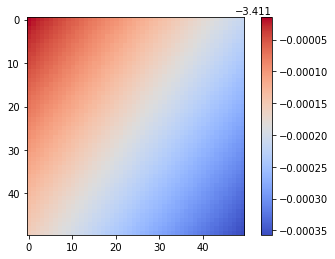

In [73]:
plt.imshow(low_loss_surface.log().detach(), cmap="coolwarm")
plt.colorbar()

In [74]:

basis = e_vec
ls1 = loss_surfaces.get_loss_surface(basis, model,
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=10., n_pts=50, scale=2.,
                                             use_cuda=False)

In [75]:
nvec = 1500
basis = e_vec[:, -nvec:]
ls2 = loss_surfaces.get_loss_surface(basis, model,
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=10., n_pts=50, scale=2.,
                                             use_cuda=False)

basis = e_vec[:, -3:]
ls3 = loss_surfaces.get_loss_surface(basis, model,
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=10., n_pts=50, scale=2.,
                                             use_cuda=False)

In [76]:
ymin = torch.min(ls1).log()
ymax = torch.max(ls1).log()

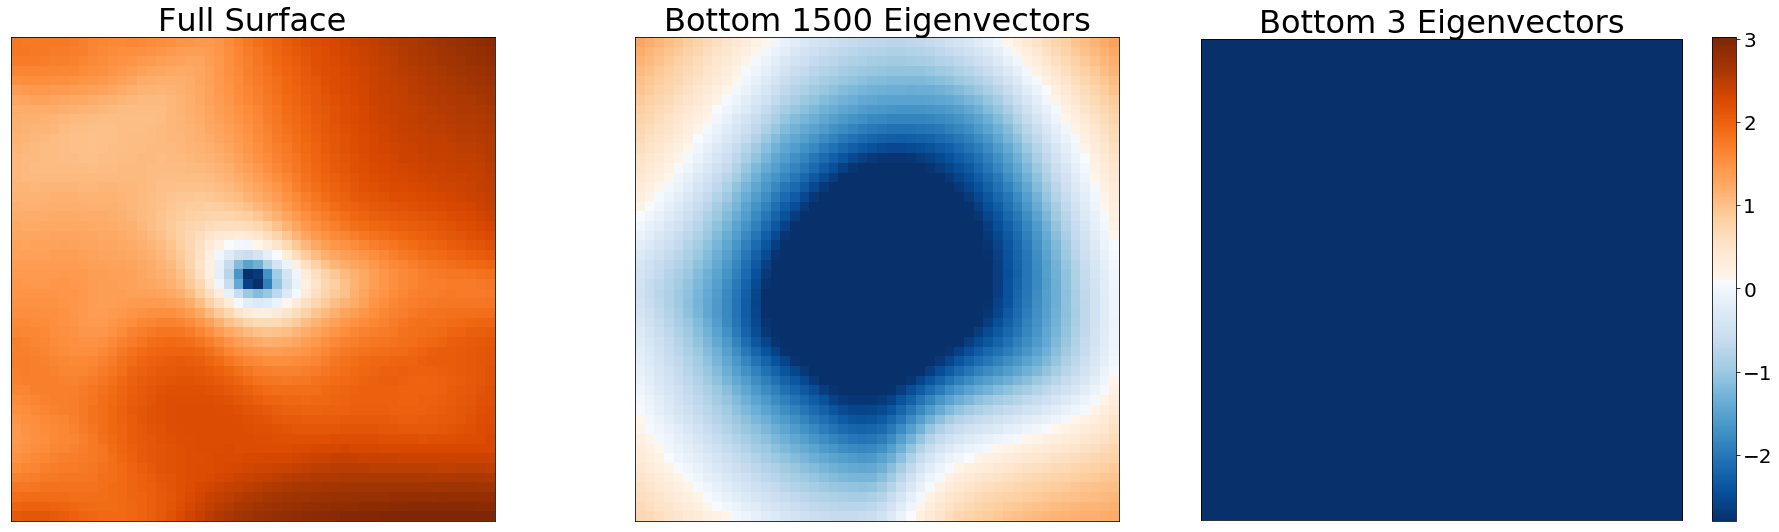

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(26, 7.5))
im = ax[0].imshow(ls1.log().detach(), cmap=newcmp)
# ax[0].autoscale(False)
# cbar=fig.colorbar(im, ax=ax[0])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
ax[0].set_title("Full Surface",
               fontsize=title_fs)
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(ls2.log().detach(), cmap=newcmp,
                 vmin=ymin, vmax=ymax)
# cbar=fig.colorbar(im, ax=ax[1])
cbar.ax.tick_params(labelsize=20)
# ax[1].autoscale(False)
ax[1].set_title("Bottom %i Eigenvectors" % nvec,
               fontsize=title_fs)
ax[1].set_xticks([])
ax[1].set_yticks([])

im = ax[2].imshow(ls3.log().detach(), cmap=newcmp, vmin=ymin, vmax=ymax)
# cbar=fig.colorbar(im, ax=ax[2])
# cbar.ax.tick_params(labelsize=20)
# cbar.ax.yaxis.offsetText.set(size=20)
ax[2].set_title("Bottom 3 Eigenvectors",
               fontsize=title_fs);
ax[2].set_xticks([])
ax[2].set_yticks([])
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20)
plt.tight_layout()

# fig.suptitle("Extzended Log-Loss Surfaces", fontsize=34)
plt.savefig("./ext-loss-surface.pdf", bbox_inches="tight")
plt.show()

In [78]:
pars = utils.flatten([p for p in model.parameters()]) 

### Generate Parameter Perturbations in Low-Curvature Directions

In [100]:
buffer = 0.4
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()

In [113]:
model.load_state_dict(saved_pars)
orig_preds = torch.sigmoid(model(in_grid).squeeze().cpu()).reshape(xx.shape)
orig_pt_pred = torch.sigmoid(model(train_x))

In [114]:
n_vec = 1500
scale = 0.1
basis = e_vec[:, -n_vec:]

model.load_state_dict(saved_pars)
wghts = torch.randn(n_vec).cpu()
perturb = basis.matmul(wghts.unsqueeze(-1)).t()
perturb = perturb.div(perturb.norm()).mul(scale)

perturb = utils.unflatten_like(perturb, model.parameters())
for i, par in enumerate(model.parameters()):
    par.data = par.data + perturb[i]

low_pred = torch.sigmoid(model(in_grid).squeeze().cpu()).reshape(xx.shape)
low_pt_pred = torch.sigmoid(model(train_x))

In [115]:
n_vec = 3
scale = 0.05
basis = e_vec[:, :n_vec]


model.load_state_dict(saved_pars)
wghts = torch.randn(n_vec).cpu()
perturb = basis.matmul(wghts.unsqueeze(-1)).t()
perturb = perturb.div(perturb.norm()).mul(scale)

perturb = utils.unflatten_like(perturb, model.parameters())
for i, par in enumerate(model.parameters()):
    par.data = par.data + perturb[i]

high_pred = torch.sigmoid(model(in_grid).squeeze().cpu()).reshape(xx.shape)

In [116]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

In [117]:
import seaborn as sns
import pandas as pd

dat = pd.DataFrame({'x1': train_x[:, 0], 'x2': train_x[:, 1], "y":train_y[:, 0]})

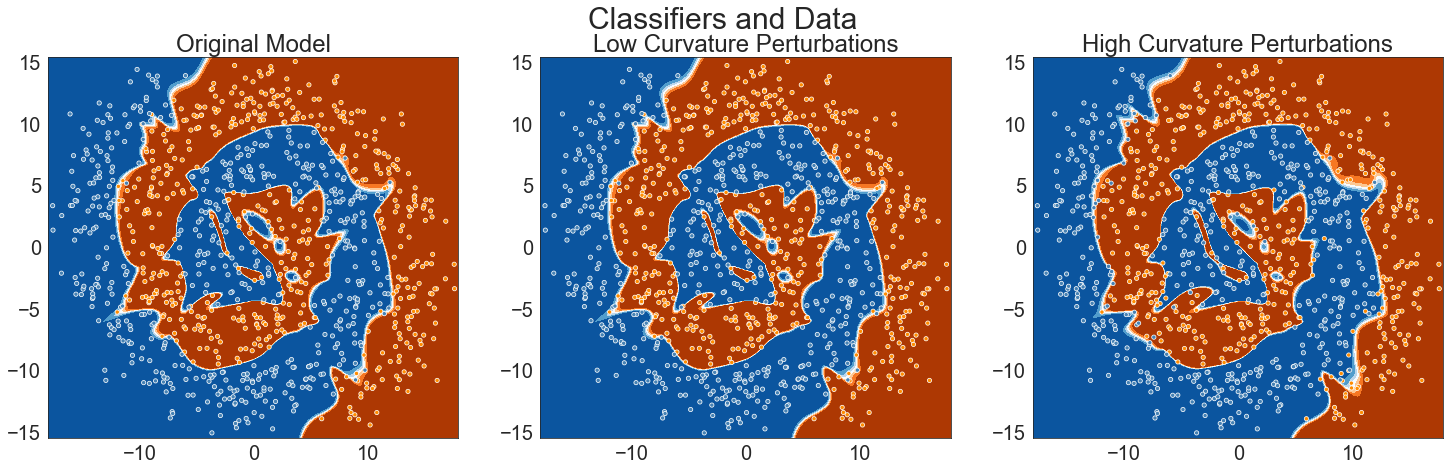

In [118]:
sup_fs = 30
title_fs = 24
ax_fs = 20
colors = newcmp


sns.set_style("white")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 7))

fig.suptitle('Classifiers and Data', fontsize=sup_fs)


ax1.contourf(xx, yy, orig_preds.detach(), cmap=colors)
sns.scatterplot(x='x1', y='x2', hue='y', data=dat, ax=ax1,
               palette=['darkorange', 'steelblue'], size=1, legend=False)
ax1.set_title("Original Model", fontsize=title_fs)
ax1.tick_params(axis="both", labelsize=ax_fs)
ax1.set(xlabel='', ylabel='')

ax2.contourf(xx, yy, low_pred.detach(), cmap=colors)
# ax2.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary,
#            s=3)
ax2.set_title("Low Curvature Perturbations", fontsize=title_fs)
sns.scatterplot(x='x1', y='x2', hue='y', data=dat, ax=ax2,
               palette=['darkorange', 'steelblue'], size=1, legend=False)
ax2.tick_params(axis="both", labelsize=ax_fs)
ax2.set(xlabel='', ylabel='')

ax3.contourf(xx, yy, high_pred.detach(), cmap=colors)
# ax3.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary,
#         s=3)
sns.scatterplot(x='x1', y='x2', hue='y', data=dat, ax=ax3,
               palette=['darkorange', 'steelblue'], size=1, legend=False)
ax3.set_title("High Curvature Perturbations", fontsize=title_fs)
ax3.tick_params(axis="both", labelsize=ax_fs)
ax3.set(xlabel='', ylabel='')

plt.savefig("./perturbed-classifiers.pdf", bbox_inches='tight')

### Do the Original and Low Curvature Models predict the same?

In [119]:
orig_pt_pred[orig_pt_pred < 0.5] = 0
orig_pt_pred[orig_pt_pred >= 0.5] = 1

low_pt_pred[low_pt_pred < 0.5] = 0
low_pt_pred[low_pt_pred >= 0.5] = 1

In [120]:
torch.sum(orig_pt_pred - low_pt_pred)

tensor(0., grad_fn=<SumBackward0>)

## Quantify Sensitivity to Perturbations

In [199]:
n_bases = 5
n_scale = 5
max_scale = 1.
scales = torch.linspace(0, max_scale, n_scale)
loss_outs = torch.zeros(n_bases, n_scale)
loss_func = torch.nn.BCEWithLogitsLoss()
n_restarts = 10

for base in range(n_bases):
    for scale_ind, scale in enumerate(scales):
        basis = e_vec[:, :(base+1)]
        temp_losses = torch.zeros(n_restarts)
        for rst in range(n_restarts):

            model.load_state_dict(saved_pars)
            wghts = torch.randn(base+1).cpu()
            perturb = basis.matmul(wghts.unsqueeze(-1)).t()
            perturb = perturb.div(perturb.norm()).mul(scale)

            perturb = utils.unflatten_like(perturb, model.parameters())
            for i, par in enumerate(model.parameters()):
                par.data = par.data + perturb[i]

            outputs = model(train_x)
            temp_losses[rst] = loss_func(outputs, train_y).item()
            
        loss_outs[base,  scale_ind] = temp_losses.mean()

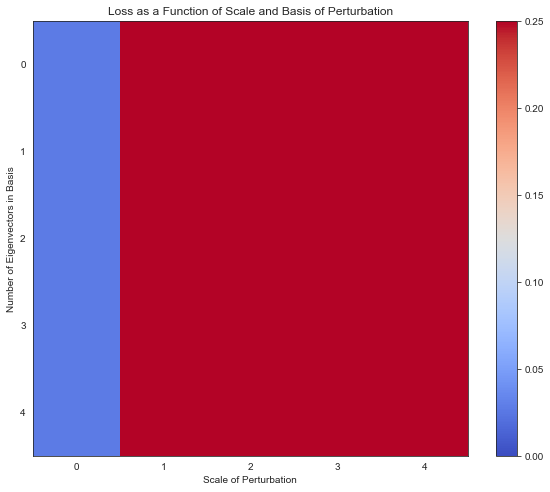

In [200]:
plt.figure(figsize=(10, 8))
plt.imshow(loss_outs.detach(), cmap="coolwarm", vmin=0., vmax=0.25)
plt.colorbar()
plt.ylabel("Number of Eigenvectors in Basis")
plt.xlabel("Scale of Perturbation")
# plt.yticks(np.arange(0, n_bases, 5), np.arange(0, n_bases, 5), va='center')
# plt.yticks(np.arange(n_bases), 1+np.arange(n_bases))
loc, lab = plt.yticks()
plt.title("Loss as a Function of Scale and Basis of Perturbation")
plt.show()

In [201]:
loss_table = torch.cat((scales.unsqueeze(0), loss_outs), 0)
loss_table = torch.cat((torch.arange(n_bases+1).unsqueeze(-1).float(), loss_table), 1)

In [202]:
loss_table.shape

torch.Size([6, 6])

In [203]:
loss_table

tensor([[ 0.0000,  0.0000,  0.2500,  0.5000,  0.7500,  1.0000],
        [ 1.0000,  0.0277,  3.6711,  8.7949, 10.2698, 10.4710],
        [ 2.0000,  0.0277,  2.5581,  9.1294,  8.8309, 13.0949],
        [ 3.0000,  0.0277,  2.8572,  8.4393, 12.6736, 13.7980],
        [ 4.0000,  0.0277,  2.3188,  8.8965, 11.7540, 17.8393],
        [ 5.0000,  0.0277,  2.8264, 10.6449,  9.8292, 16.0168]])

In [204]:
loss_table = loss_table[:, (0, 2, 3, 4, 5)]

In [205]:
loss_table

tensor([[ 0.0000,  0.2500,  0.5000,  0.7500,  1.0000],
        [ 1.0000,  3.6711,  8.7949, 10.2698, 10.4710],
        [ 2.0000,  2.5581,  9.1294,  8.8309, 13.0949],
        [ 3.0000,  2.8572,  8.4393, 12.6736, 13.7980],
        [ 4.0000,  2.3188,  8.8965, 11.7540, 17.8393],
        [ 5.0000,  2.8264, 10.6449,  9.8292, 16.0168]])

In [206]:
np.savetxt("high_curve_losses.txt", loss_table, delimiter=' & ', fmt='%.4f', newline=' \\\\\n')

In [221]:
n_bases = 2000
max_scale = 4
scales = torch.linspace(0, 2., n_scale)
low_curve_loss_outs = torch.zeros(n_scale)
loss_func = torch.nn.BCEWithLogitsLoss()
n_restarts = 10

# for base in range(n_bases):
for scale_ind, scale in enumerate(scales):
    basis = e_vec[:, -n_bases:]
    temp_losses = torch.zeros(n_restarts)
    for rst in range(n_restarts):

        model.load_state_dict(saved_pars)
        wghts = torch.randn(n_bases).cpu()
        perturb = basis.matmul(wghts.unsqueeze(-1)).t()
        perturb = perturb.div(perturb.norm()).mul(scale)

        perturb = utils.unflatten_like(perturb, model.parameters())
        for i, par in enumerate(model.parameters()):
            par.data = par.data + perturb[i]

        outputs = model(train_x)
        temp_losses[rst] = loss_func(outputs, train_y).item()

    low_curve_loss_outs[scale_ind] = temp_losses.mean()

In [222]:
low_curve_loss_outs

tensor([0.0277, 0.0277, 0.0288, 0.0334, 0.0445])

In [223]:
low_curve_loss_table = torch.cat((scales.unsqueeze(0), low_curve_loss_outs.unsqueeze(0)), 0)

In [224]:
low_curve_loss_table = low_curve_loss_table[:, 1:]

In [225]:
low_curve_loss_table

tensor([[0.5000, 1.0000, 1.5000, 2.0000],
        [0.0277, 0.0288, 0.0334, 0.0445]])

In [226]:
np.savetxt("low_curve_losses.txt", low_curve_loss_table, delimiter=' & ', fmt='%.4f', newline=' \\\\\n')

## And Plot some Sample Classifiers

In [121]:
n_vec = 1
n_scale = 10
max_scale = 0.5
scales = torch.linspace(0, max_scale, n_scale)
basis = e_vec[:, :n_vec]
high_preds = torch.zeros(n_scale, xx.shape[0], xx.shape[1])

for scl_ind, scl in enumerate(scales):
    model.load_state_dict(saved_pars)
    wghts = torch.randn(n_vec).cpu()
    perturb = basis.matmul(wghts.unsqueeze(-1)).t()
    perturb = perturb.div(perturb.norm()).mul(scl)

    perturb = utils.unflatten_like(perturb, model.parameters())
    for i, par in enumerate(model.parameters()):
        par.data = par.data + perturb[i]

    high_preds[scl_ind, :, :] = torch.sigmoid(model(in_grid).squeeze().cpu()).reshape(xx.shape)

In [122]:
n_vec = 1500
basis = e_vec[:, -n_vec:]
low_preds = torch.zeros(n_scale, xx.shape[0], xx.shape[1])

n_scale = 10
max_scale = 2.
low_scales = torch.linspace(0, max_scale, n_scale)
for scl_ind, scl in enumerate(low_scales):
    model.load_state_dict(saved_pars)
    wghts = torch.randn(n_vec).cpu()
    perturb = basis.matmul(wghts.unsqueeze(-1)).t()
    perturb = perturb.div(perturb.norm()).mul(scl)

    perturb = utils.unflatten_like(perturb, model.parameters())
    for i, par in enumerate(model.parameters()):
        par.data = par.data + perturb[i]

    low_preds[scl_ind, :, :] = torch.sigmoid(model(in_grid).squeeze().cpu()).reshape(xx.shape)

In [123]:
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

subtitle_fs = 26
title_fs = 40

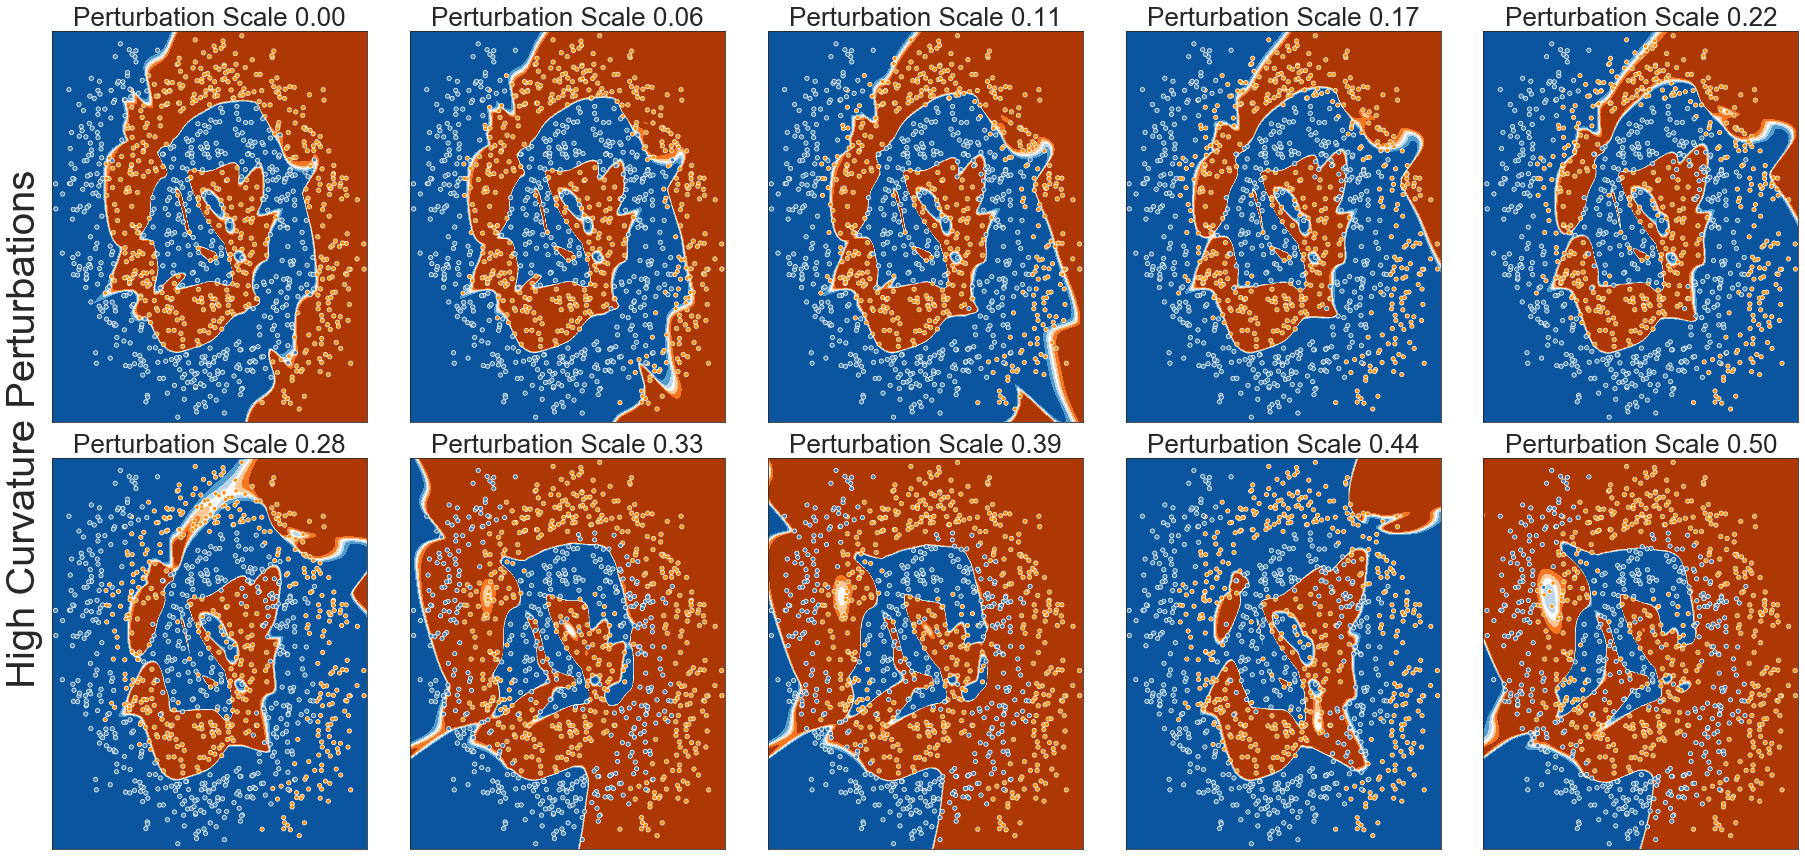

In [124]:
sns.set_style("white")
f, axes = plt.subplots(2, 5, figsize=(25, 12), sharex=True)
for ii in range(2):
    for scl_ind in range(5):
        axes[ii, scl_ind].contourf(xx, yy, high_preds[ii*5 + scl_ind, :, :].detach(),
                                  cmap=newcmp)
        sns.scatterplot(x='x1', y='x2', hue='y', data=dat, ax=axes[ii, scl_ind],
                       palette=['darkorange', 'steelblue'], size=1, legend=False)
        axes[ii, scl_ind].set_ylabel("")
        axes[ii, scl_ind].set_xlabel("")
        axes[ii, scl_ind].set_title("Perturbation Scale %.2f"  % scales[ii*5 + scl_ind].item(),
                                   fontsize=subtitle_fs)

plt.setp(axes, yticks=[], xticks=[])
f.text(-0.01, 0.5, 'High Curvature Perturbations', va='center', rotation='vertical',
      fontsize=title_fs)
plt.tight_layout()
plt.savefig("./high_curve_perturbations.pdf", bbox_inches="tight")

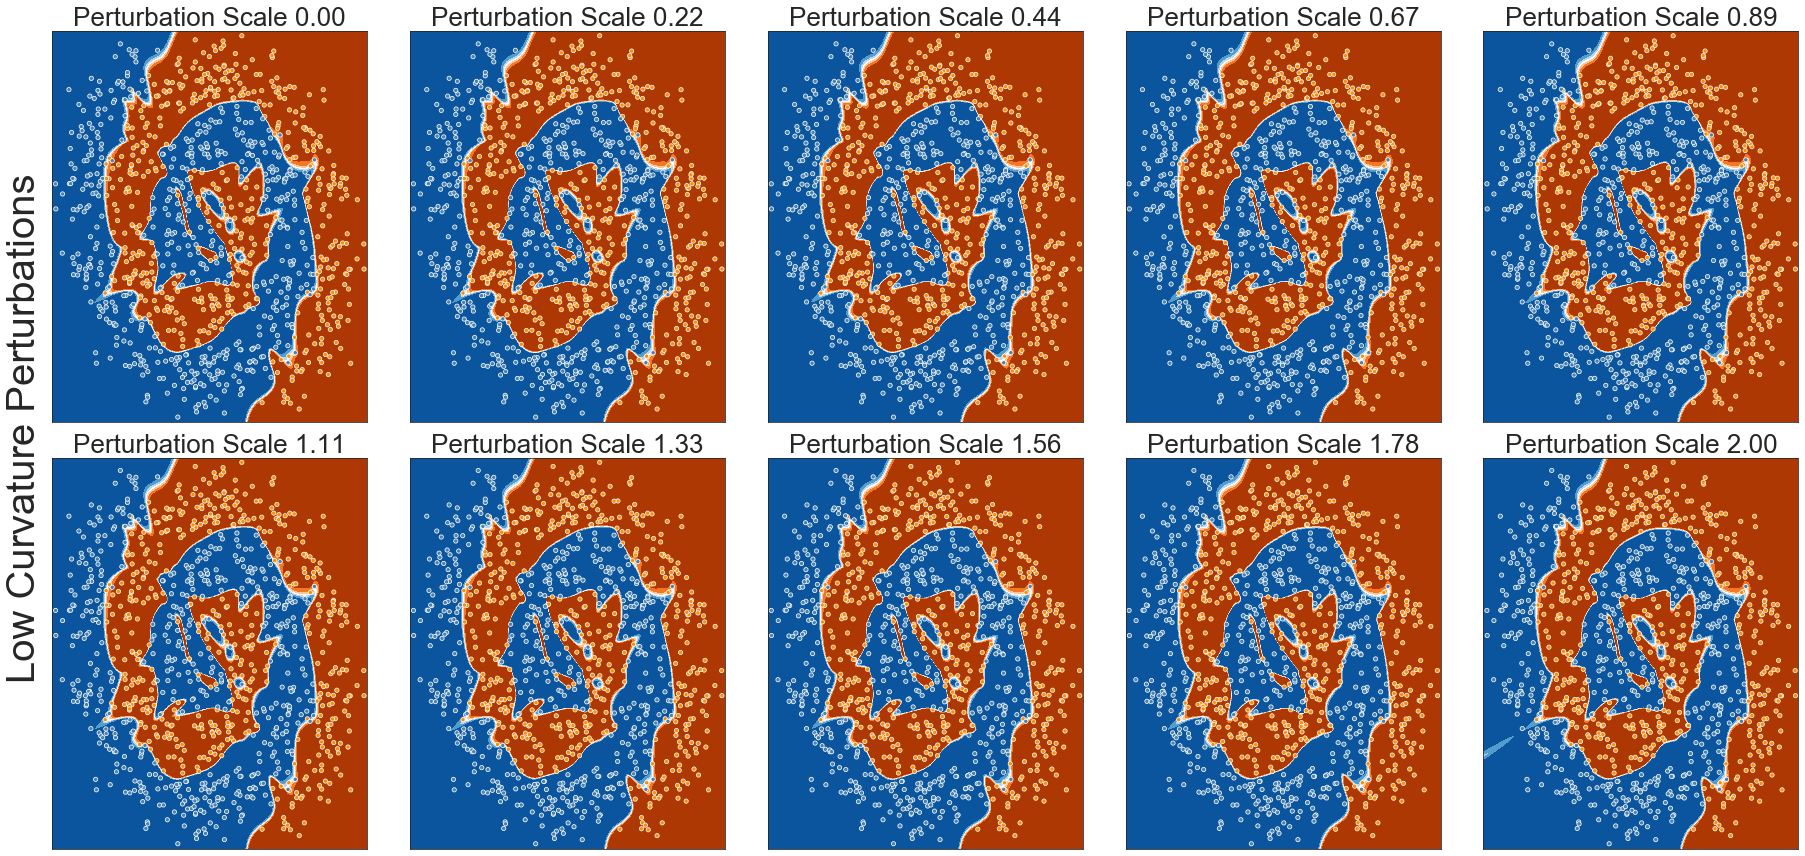

In [126]:
sns.set_style("white")
f, axes = plt.subplots(2, 5, figsize=(25, 12), sharex=True)
for ii in range(2):
    for scl_ind in range(5):
        axes[ii, scl_ind].contourf(xx, yy, low_preds[ii*5 + scl_ind, :, :].detach(),
                                  cmap=newcmp)
        sns.scatterplot(x='x1', y='x2', hue='y', data=dat, ax=axes[ii, scl_ind],
                       palette=['darkorange', 'steelblue'], size=1, legend=False)
        axes[ii, scl_ind].set_ylabel("")
        axes[ii, scl_ind].set_xlabel("")
        axes[ii, scl_ind].set_title("Perturbation Scale %.2f"  % low_scales[ii*5 + scl_ind].item(),
                                   fontsize=subtitle_fs)

plt.setp(axes, yticks=[], xticks=[])
f.text(-0.01, 0.5, 'Low Curvature Perturbations', va='center', rotation='vertical',
      fontsize=title_fs)
plt.tight_layout()
plt.savefig("./low_curve_perturbations.pdf", bbox_inches="tight")